In [22]:
import numpy as np
from hmmlearn import hmm
from matplotlib import pyplot as plt
import scienceplots

plt.style.use(['science', 'grid'])
plt.rc('figure', titlesize = 33, figsize = (21, 7), dpi = 210)
plt.rc('axes', titlesize = 27, labelsize = 21, titlepad = 21)
plt.rc('xtick', labelsize = 17)
plt.rc('ytick', labelsize = 17)

## setup

simulated multichannel EEG-like data with stable state transitions, fit a Gaussian HMM trained on half the data, predicted on the other half, extracted the transition matrix, and visualized the latent state dynamics over time.

### simulate EEG data

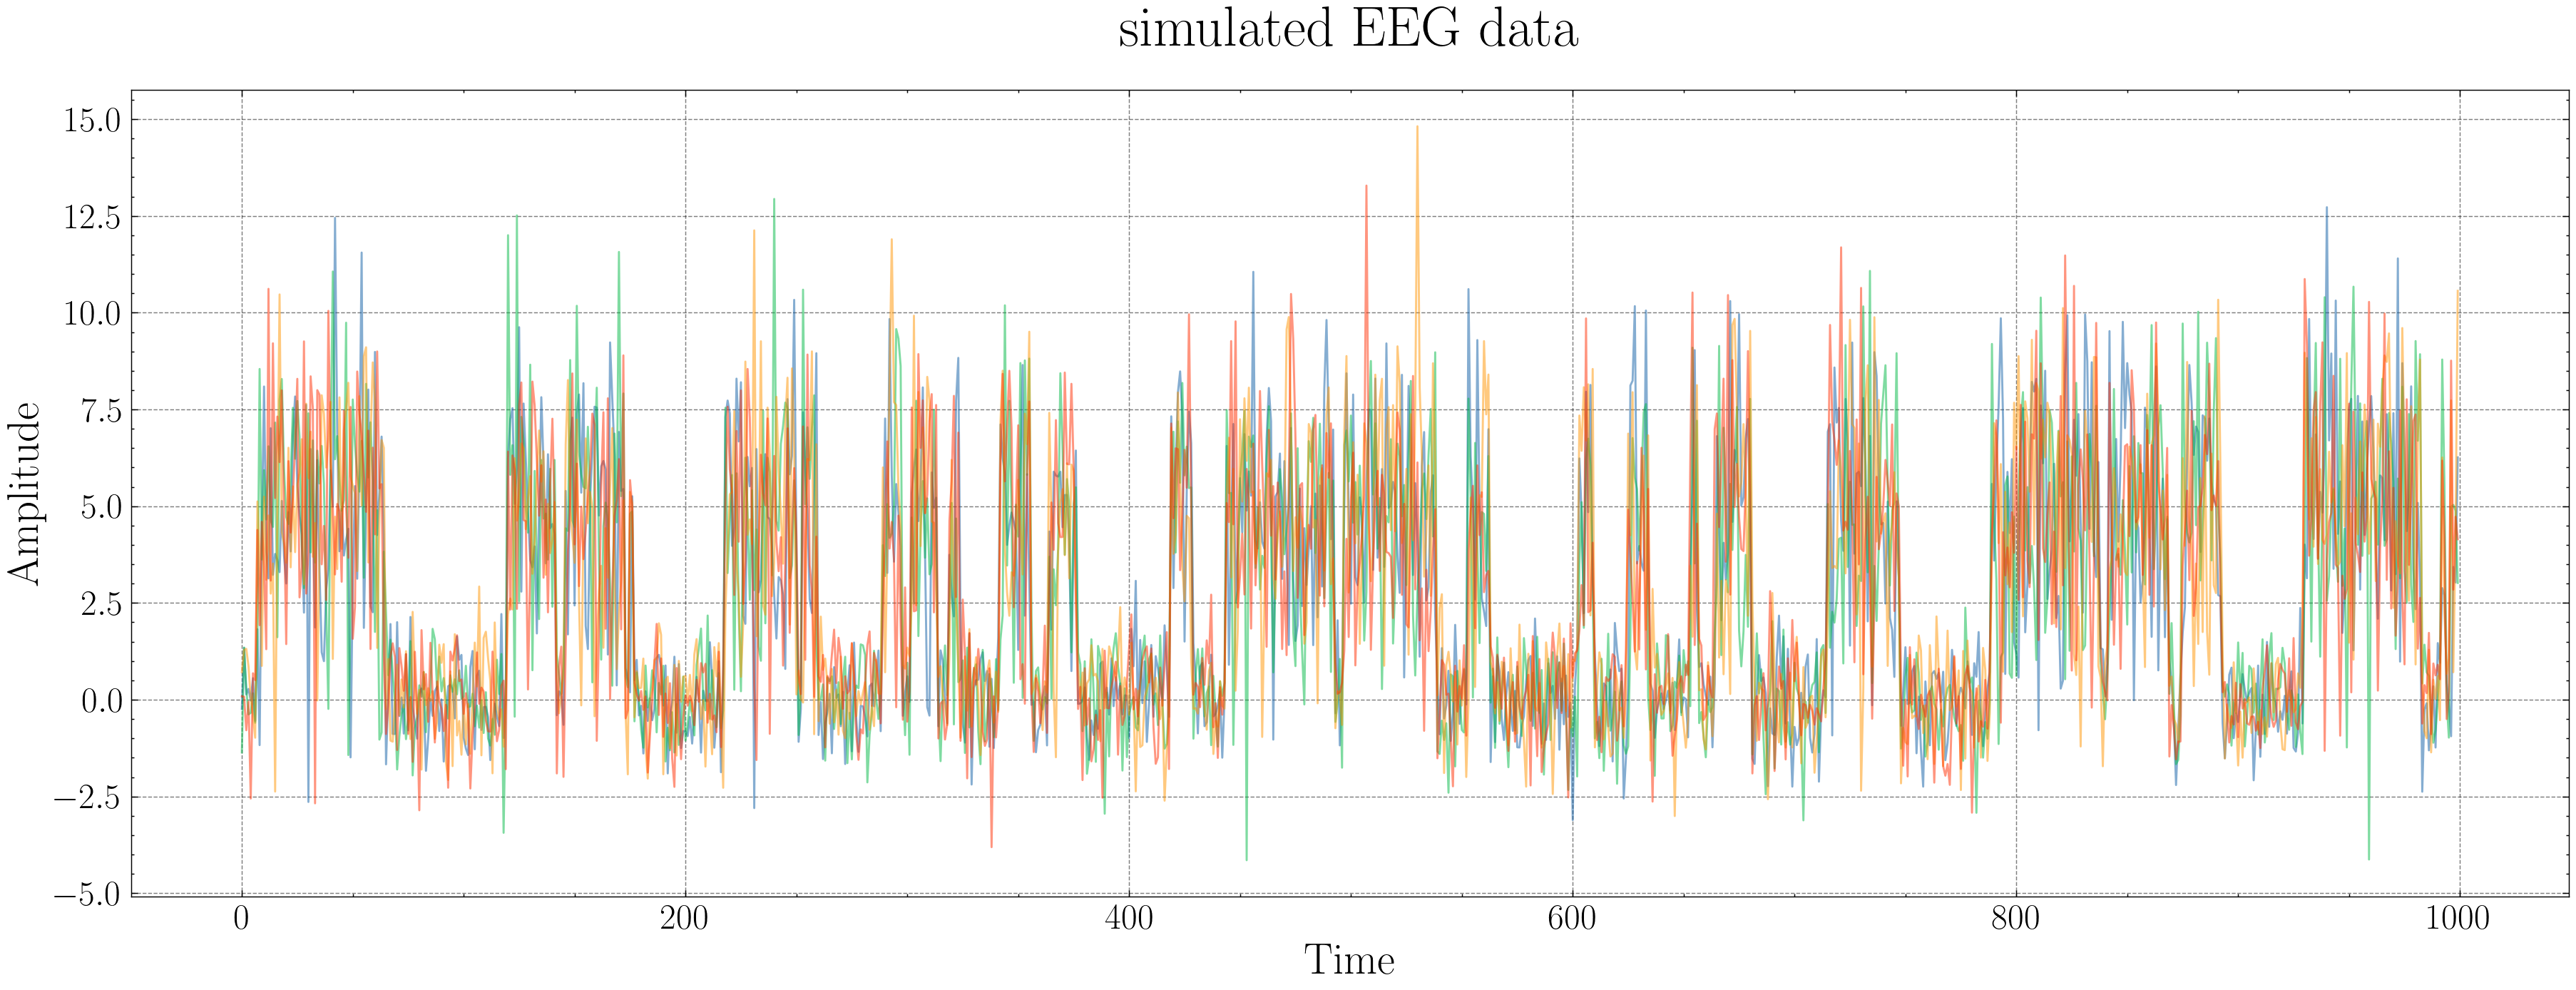

In [24]:
n_samples = 1000
n_channels = 4

# define transition probability matrix
transition = np.array(
    [[0.95, 0.05],
    [0.05, 0.95]]
)

# generate the sequence
sequence = np.zeros(n_samples)
for t in range(1, n_samples):
    current = int(sequence[t - 1])
    sequence[t] = np.random.choice([0, 1], p = transition[current])
    
# generate the EEG data
off = np.random.normal(0, 1, (n_samples, n_channels))
on = np.random.normal(5, 2.5, (n_samples, n_channels))

X = np.where(sequence[:, np.newaxis] == 0, off, on)
X += np.random.normal(0, 0.1, (n_samples, n_channels))

X_train = X[:n_samples // 2]
X_test = X[n_samples // 2:]

plt.figure(figsize=(21, 7))
plt.plot(X, alpha = 0.5)
plt.title("simulated EEG data")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


### construct HMM

In [25]:
# gaussian HMM
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)
model.fit(X_train)

# predict the hidden states
hidden_states = model.predict(X_test)

transition_matrix = model.transmat_
print("Transition matrix:\n", transition_matrix)

Transition matrix:
 [[0.94067592 0.05932408]
 [0.049431   0.950569  ]]


### visualise the hidden states

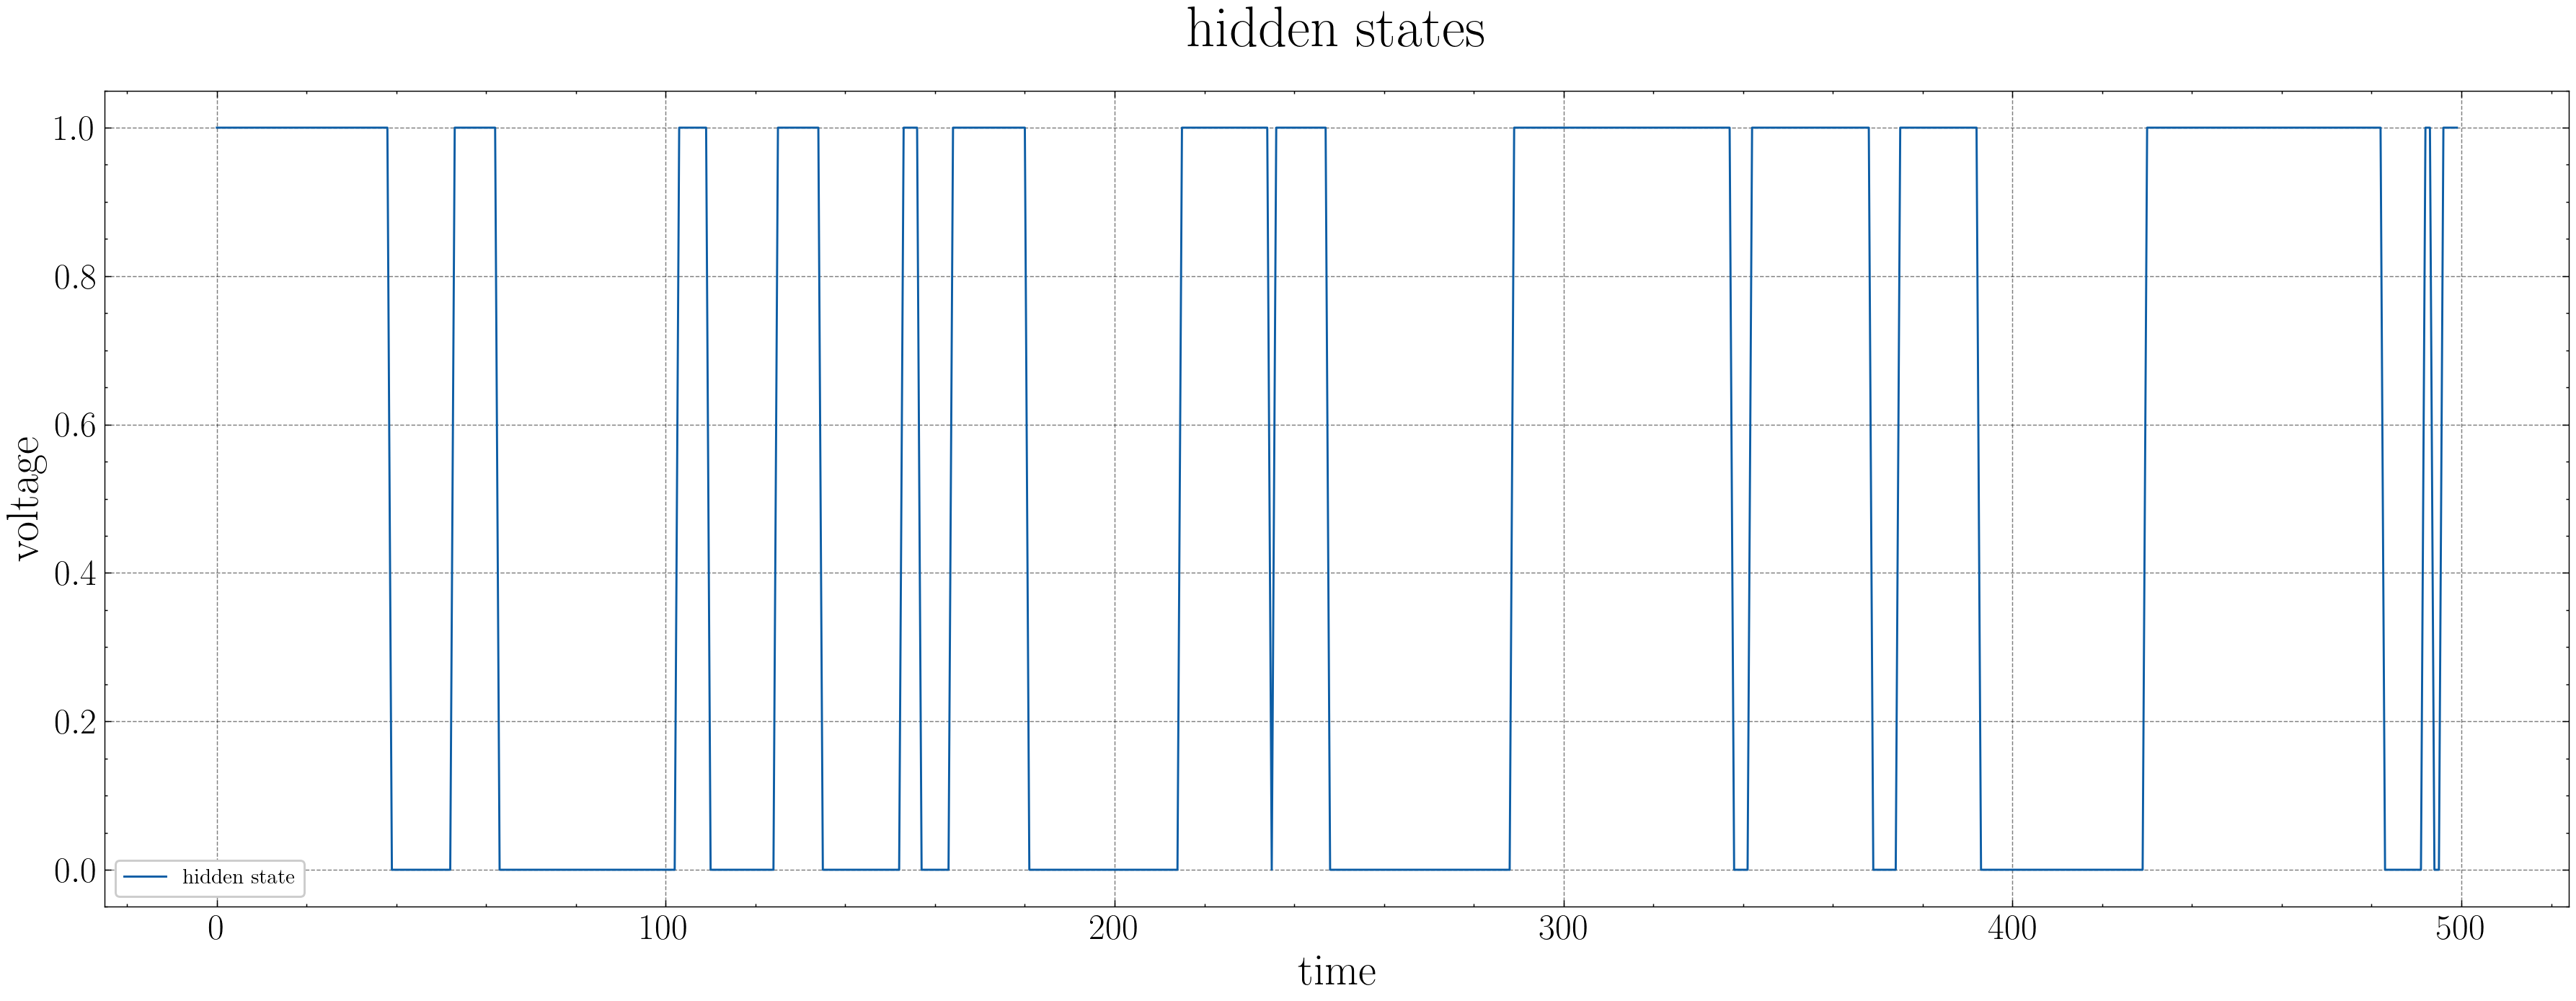

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(21, 7))

plt.plot(hidden_states, label = "hidden state")
plt.title("hidden states")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend()
plt.show()
